# Regression Analysis on Climate Attributes. 

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

### Read the File.

In [2]:
df=pd.read_csv("F:/Datasets/climate_data.csv")

### Show the top 10 records.

In [3]:
df.head(10)

,Date,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph)
0,01-01-2009,37.8,35,12.7,29.7,26.4,36.8
1,02-01-2009,43.2,32,14.7,29.5,12.8,18.0
2,03-01-2009,25.7,60,12.7,29.7,8.3,12.2
3,04-01-2009,9.3,67,0.1,30.4,2.9,4.5
4,05-01-2009,23.5,30,-5.3,29.9,16.7,23.1
5,06-01-2009,24.8,42,4.6,29.8,16.0,23.9
6,07-01-2009,34.2,60,21.6,29.7,20.4,30.0
7,08-01-2009,42.1,41,20.0,29.8,17.5,25.2
8,09-01-2009,30.3,46,11.4,30.0,6.9,10.6
9,10-01-2009,26.2,38,3.6,30.4,18.2,24.6


### Find the Structure of Dataset.

In [4]:
df.shape

(3902, 7)

### Information about the Dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3902 entries, 0 to 3901
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      3902 non-null   object 
 1   Average temperature (°F)  3902 non-null   float64
 2   Average humidity (%)      3902 non-null   int64  
 3   Average dewpoint (°F)     3902 non-null   float64
 4   Average barometer (in)    3902 non-null   float64
 5   Average windspeed (mph)   3902 non-null   float64
 6   Average gustspeed (mph)   3902 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 213.5+ KB


### Check the null values.

In [6]:
df.isnull().sum()

Date                        0
Average temperature (°F)    0
Average humidity (%)        0
Average dewpoint (°F)       0
Average barometer (in)      0
Average windspeed (mph)     0
Average gustspeed (mph)     0
dtype: int64

### Statistical Information about the Dataset.

In [7]:
df.describe()

,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph)
count,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000
mean,44.670733,48.878011,23.127037,29.881420,5.758893,10.011968
std,15.326793,17.438153,14.634088,0.250395,4.022485,14.117446
min,-12.100000,9.000000,-22.200000,28.200000,0.000000,0.000000
25%,33.700000,36.000000,12.100000,29.700000,2.700000,4.500000
50%,45.100000,47.000000,22.500000,29.900000,4.600000,7.100000
75%,58.000000,61.000000,35.400000,30.000000,8.000000,12.100000
max,76.300000,94.000000,55.100000,31.000000,26.400000,240.400000


### Histogram of Climate Attributes.

array([[<AxesSubplot:title={'center':'Average temperature (°F)'}>,
        <AxesSubplot:title={'center':'Average humidity (%)'}>],
       [<AxesSubplot:title={'center':'Average dewpoint (°F)'}>,
        <AxesSubplot:title={'center':'Average barometer (in)'}>],
       [<AxesSubplot:title={'center':'Average windspeed (mph)'}>,
        <AxesSubplot:title={'center':'Average gustspeed (mph)'}>]],
      dtype=object)

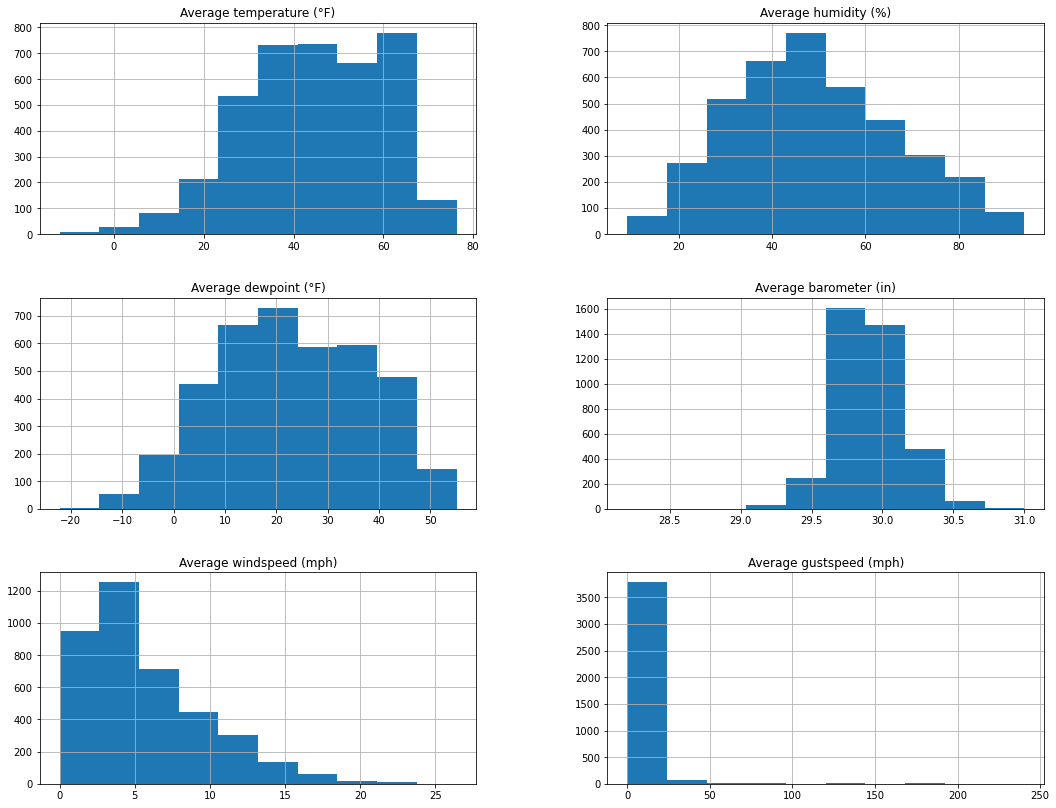

In [8]:
df.hist(figsize=(18,14))

### Distribution Graph of Average Temperature.

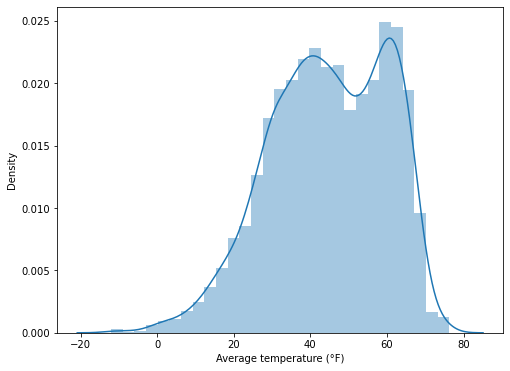

In [9]:
plt.figure(figsize=(8,6))
sns.distplot(df["Average temperature (°F)"])
plt.show()

### Distribution Graph of Average Humidity.

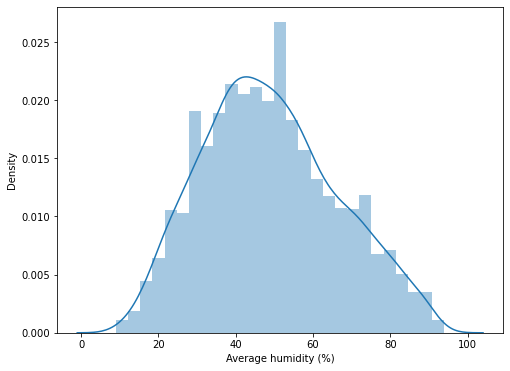

In [10]:
plt.figure(figsize=(8,6))
sns.distplot(df["Average humidity (%)"])
plt.show()

### Distribution Graph of Average Dewpoint.

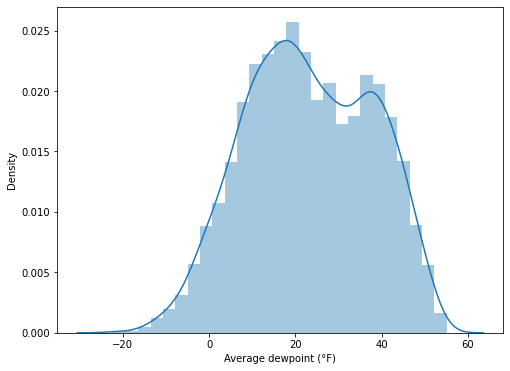

In [11]:
plt.figure(figsize=(8,6))
sns.distplot(df["Average dewpoint (°F)"])
plt.show()

### Distribution Graph of Average Pressure.

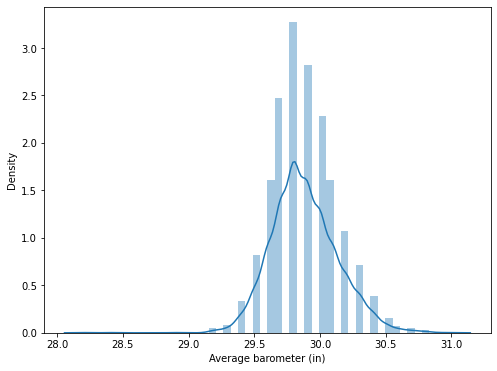

In [12]:
plt.figure(figsize=(8,6))
sns.distplot(df["Average barometer (in)"])
plt.show()

### Distribution Graph of Average WindSpeed.

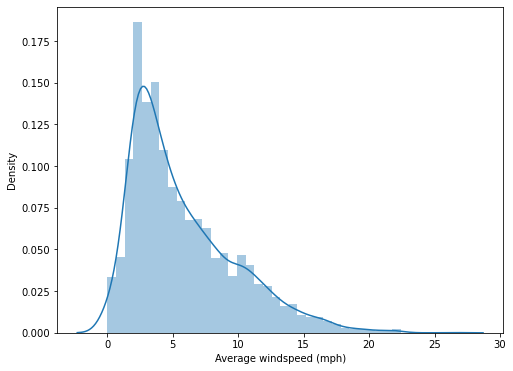

In [13]:
plt.figure(figsize=(8,6))
sns.distplot(df["Average windspeed (mph)"])
plt.show()

### Distribution Graph of Average GustSpeed.

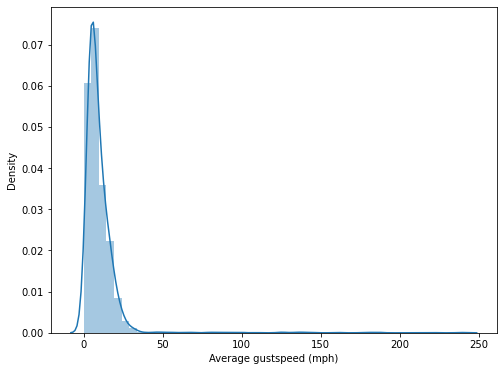

In [14]:
plt.figure(figsize=(8,6))
sns.distplot(df["Average gustspeed (mph)"])
plt.show()

### Pairplot of Climate Attributes. 

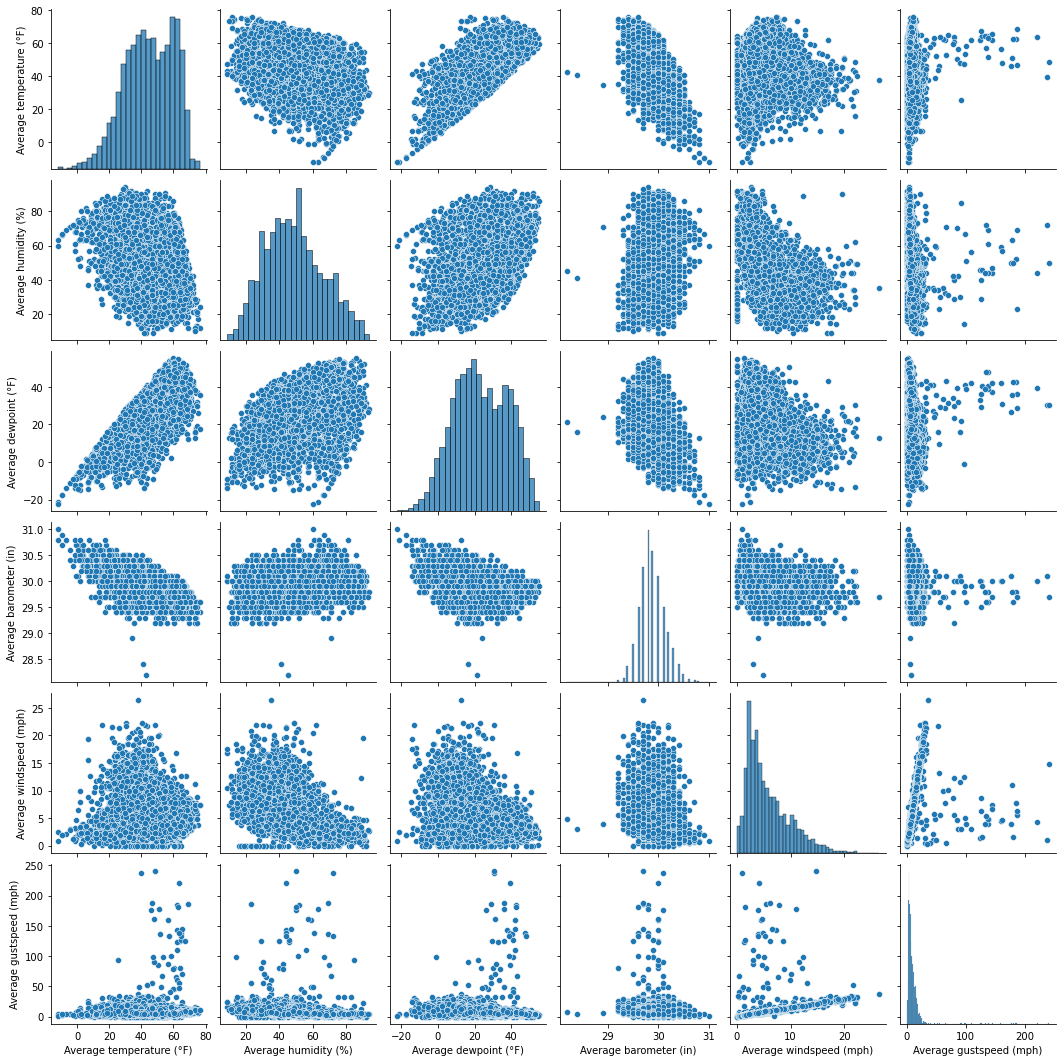

In [15]:
sns.pairplot(df)

### Scatterplot of Temperature v/s Pressure.

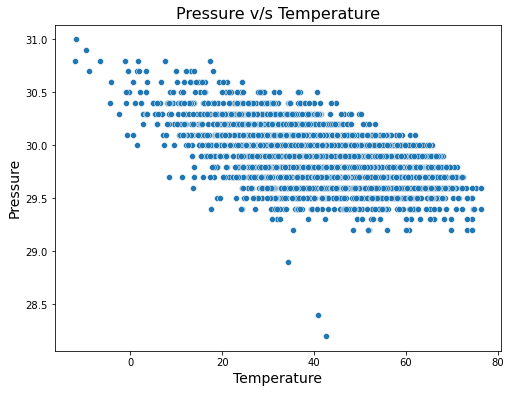

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(y=df["Average barometer (in)"],x=df["Average temperature (°F)"])
plt.title("Pressure v/s Temperature",size=16)
plt.ylabel("Pressure",size=14)
plt.xlabel("Temperature",size=14)
plt.show()

### Regression Plot.

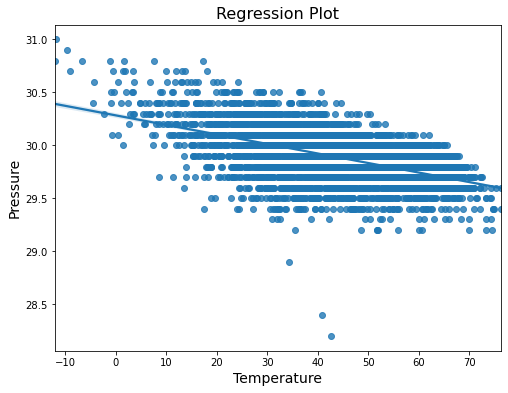

In [17]:
plt.figure(figsize=(8,6))
sns.regplot(y=df["Average barometer (in)"],x=df["Average temperature (°F)"])
plt.title("Regression Plot",size=16)
plt.ylabel("Pressure",size=14)
plt.xlabel("Temperature",size=14)
plt.show()

### Heat map shows the relationships between the Climate Attributes.

<AxesSubplot:>

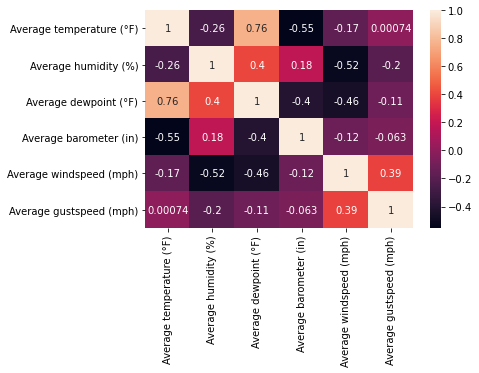

In [18]:
sns.heatmap(df.corr(),annot=True)

In [19]:
x=df.iloc[:,-6:-5].values
y=df.iloc[:,4].values

In [20]:
x

array([[37.8],
       [43.2],
       [25.7],
       ...,
       [60.6],
       [61.7],
       [60.5]])

In [21]:
y

array([29.7, 29.5, 29.7, ..., 29.8, 29.9, 29.7])

## Performing the T-Test.

### Train-Test-Split Evaluation.

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=0)

In [23]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3511, 1)
(391, 1)
(3511,)
(391,)


In [24]:
print(np.mean(x_train))
print(np.mean(x_test))
print(np.mean(y_train))
print(np.mean(y_test))

44.56058103104529
45.65984654731458
29.881031045286242
29.884910485933503


In [25]:
l=LinearRegression()
l.fit(x_train,y_train)
print("train test complete")

train test complete


In [26]:
y_pred=l.predict(x_test)

In [27]:
d1=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
d1

,Actual,Predicted
0,30.1,30.103036
1,30.1,29.841065
2,30.1,30.004910
3,30.1,30.095834
4,30.1,29.953596
...,...,...
386,29.8,29.728535
387,30.4,30.118340
388,29.9,29.718632
389,29.9,29.757343


In [28]:
print("Mean Absolute Error",mean_absolute_error(y_test,y_pred))

Mean Absolute Error 0.1602636452490717


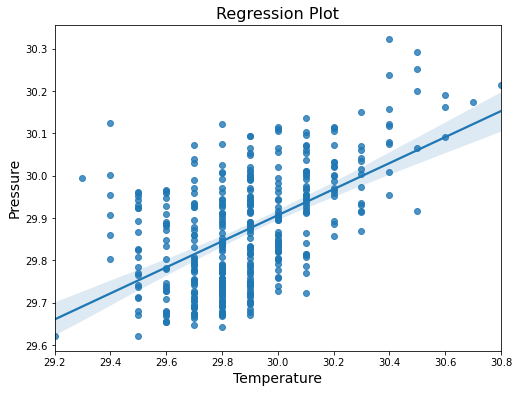

In [29]:
plt.figure(figsize=(8,6))
sns.regplot(x=y_test,y=y_pred)
plt.title("Regression Plot",size=16)
plt.ylabel("Pressure",size=14)
plt.xlabel("Temperature",size=14)
plt.show()